In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

from PIL import Image

In [181]:
file = pd.read_csv("fer2013/fer2013.csv")

In [182]:
file.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [183]:
file.shape

(35887, 3)

In [184]:
file["Usage"].unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

In [185]:
file.Usage.value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

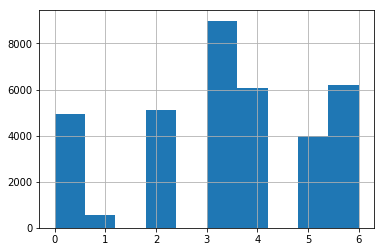

In [186]:
#Imbalanced Classes
file.emotion.hist()

In [187]:
file.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [188]:
file[file['Usage']=="PrivateTest"].head()

,emotion,pixels,Usage
32298,0,170 118 101 88 88 75 78 82 66 74 68 59 63 64 6...,PrivateTest
32299,5,7 5 8 6 7 3 2 6 5 4 4 5 7 5 5 5 6 7 7 7 10 10 ...,PrivateTest
32300,6,232 240 241 239 237 235 246 117 24 24 22 13 12...,PrivateTest
32301,4,200 197 149 139 156 89 111 58 62 95 113 117 11...,PrivateTest
32302,2,40 28 33 56 45 33 31 78 152 194 200 186 196 20...,PrivateTest


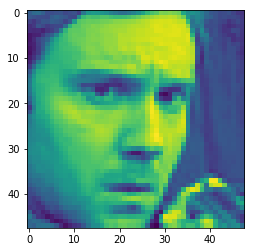

In [189]:
image = pd.to_numeric(file.pixels[0].split())
plt.imshow(image.reshape((48,48)))

In [190]:
#Function that transform the string to int, reshape to 48x48 and normalize dividing by 255
def str_to_int(x):
    X = pd.to_numeric(x).reshape((48,48)).astype(float)
    X /= 255.
    return X

#Xc = file.pixels[0].astype(float)
#Xc /= 255.

file['pixels'] = file.pixels.apply(lambda x: str_to_int(x.split()))

In [191]:
file.head()

,emotion,pixels,Usage
0,0,"[[0.274509803922, 0.313725490196, 0.3215686274...",Training
1,0,"[[0.592156862745, 0.588235294118, 0.5764705882...",Training
2,2,"[[0.905882352941, 0.83137254902, 0.61176470588...",Training
3,4,"[[0.0941176470588, 0.125490196078, 0.141176470...",Training
4,6,"[[0.0156862745098, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",Training


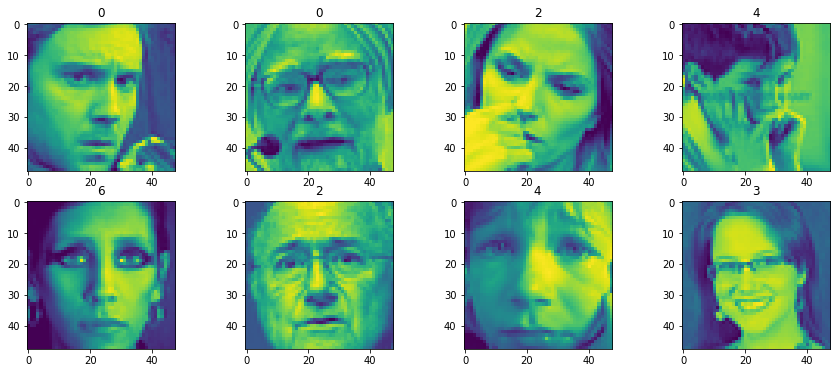

In [196]:
fig = plt.figure(figsize=(15,6))
for i,x in enumerate(file.pixels):
    if i<8:
        fig.add_subplot(2,4, i+1)
        plt.imshow(x)#, cmap='gray')
        plt.title(file.emotion[i])

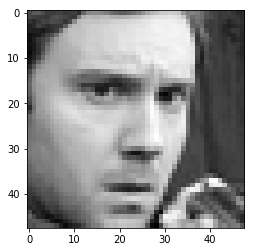

In [194]:
plt.imshow(Xc,cmap='gray')